# Task Start Here

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
benefits = pd.read_csv('BenefitsCostSharing.csv') #loading data

In [4]:
rate = pd.read_csv('Rate.csv')

In [5]:
benefits.info() #data information - original

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048408 entries, 0 to 5048407
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   BenefitName          object 
 1   BusinessYear         int64  
 2   CoinsInnTier1        object 
 3   CoinsInnTier2        object 
 4   CoinsOutofNet        object 
 5   CopayInnTier1        object 
 6   CopayInnTier2        object 
 7   CopayOutofNet        object 
 8   EHBVarReason         object 
 9   Exclusions           object 
 10  Explanation          object 
 11  ImportDate           object 
 12  IsCovered            object 
 13  IsEHB                object 
 14  IsExclFromInnMOOP    object 
 15  IsExclFromOonMOOP    object 
 16  IsStateMandate       object 
 17  IsSubjToDedTier1     object 
 18  IsSubjToDedTier2     object 
 19  IssuerId             int64  
 20  IssuerId2            int64  
 21  LimitQty             float64
 22  LimitUnit            object 
 23  MinimumStay          float64
 24

In [6]:
benefits.isnull().sum() #checking for null values

BenefitName                  0
BusinessYear                 0
CoinsInnTier1          1113847
CoinsInnTier2          4571587
CoinsOutofNet          1113847
CopayInnTier1          1113847
CopayInnTier2          4571587
CopayOutofNet          1113849
EHBVarReason           3020737
Exclusions             4572247
Explanation            4075700
ImportDate                   0
IsCovered               215980
IsEHB                  1817362
IsExclFromInnMOOP       983986
IsExclFromOonMOOP       982626
IsStateMandate         4250463
IsSubjToDedTier1       2465877
IsSubjToDedTier2       2466054
IssuerId                     0
IssuerId2                    0
LimitQty               4360725
LimitUnit              4360539
MinimumStay            5031681
PlanId                       0
QuantLimitOnSvc        3264532
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum                   0
dtype: i

In [7]:
benefits['StateCode'].equals(benefits['StateCode2']) #checking for duplicate column (different column name)

True

In [8]:
benefits['IssuerId'].equals(benefits['IssuerId2']) #checking for duplicate column (different column name)

True

In [9]:
benefits['BenefitName'].describe() #detail information about targeted column for analysis.

count                 5048408
unique                    861
top       Orthodontia - Adult
freq                    77377
Name: BenefitName, dtype: object

In [10]:
benefits['StateCode'].describe()

count     5048408
unique         39
top            WI
freq       512587
Name: StateCode, dtype: object

In [11]:
benefits['PlanId'].describe() #detail information about targeted column for analysis.

count               5048408
unique                52394
top       31274WV0310002-06
freq                    291
Name: PlanId, dtype: object

In [12]:
benefits['IsCovered'].unique() #unique values present in the column

array(['Covered', nan, 'Not Covered', 'Not covered'], dtype=object)

In [13]:
#converting value to lowercase to avoid same values with different cases
benefits['IsCovered'] = benefits['IsCovered'].str.lower()
print(benefits['IsCovered'].unique())

['covered' nan 'not covered']


In [14]:
benefits['IssuerId'].nunique()

910

In [15]:
benefits['ImportDate'].describe() #detail information about targeted column for analysis.

count                 5048408
unique                    266
top       2015-08-26 09:56:12
freq                   368148
Name: ImportDate, dtype: object

In [16]:
benefits['SourceName'].describe()

count     5048408
unique          3
top          HIOS
freq      3049221
Name: SourceName, dtype: object

In [17]:
benefits['SourceName'].nunique() #count of unique value present in the data

3

In [18]:
#creating new dataframe for the targted column only for analysis from the benefits dataframe
selected_columns = ['StateCode', 'BusinessYear','BenefitName', 'IssuerId', 'PlanId', 'IsCovered', 'ImportDate', 'SourceName']
benefits_new = benefits[selected_columns]

In [19]:
benefits_new

,StateCode,BusinessYear,BenefitName,IssuerId,PlanId,IsCovered,ImportDate,SourceName
0,AK,2014,Routine Dental Services (Adult),21989,21989AK0010001-00,covered,2014-03-19 07:06:49,HIOS
1,AK,2014,Dental Check-Up for Children,21989,21989AK0010001-00,covered,2014-03-19 07:06:49,HIOS
2,AK,2014,Basic Dental Care - Child,21989,21989AK0010001-00,covered,2014-03-19 07:06:49,HIOS
3,AK,2014,Orthodontia - Child,21989,21989AK0010001-00,covered,2014-03-19 07:06:49,HIOS
4,AK,2014,Major Dental Care - Child,21989,21989AK0010001-00,covered,2014-03-19 07:06:49,HIOS
...,...,...,...,...,...,...,...,...
5048403,WV,2016,Major Dental Care - Child,96480,96480WV0110003-00,covered,2015-08-20 12:28:36,SERFF
5048404,WV,2016,Basic Dental Care - Adult,96480,96480WV0110003-00,NaN,2015-08-20 12:28:36,SERFF
5048405,WV,2016,Orthodontia - Adult,96480,96480WV0110003-00,NaN,2015-08-20 12:28:36,SERFF
5048406,WV,2016,Major Dental Care - Adult,96480,96480WV0110003-00,NaN,2015-08-20 12:28:36,SERFF


In [20]:
benefits_new.info() #new derived dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048408 entries, 0 to 5048407
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   StateCode     object
 1   BusinessYear  int64 
 2   BenefitName   object
 3   IssuerId      int64 
 4   PlanId        object
 5   IsCovered     object
 6   ImportDate    object
 7   SourceName    object
dtypes: int64(2), object(6)
memory usage: 308.1+ MB


In [21]:
benefits_new.isnull().sum() #checking for null values

StateCode            0
BusinessYear         0
BenefitName          0
IssuerId             0
PlanId               0
IsCovered       215980
ImportDate           0
SourceName           0
dtype: int64

In [22]:
# missing values in 'IsCovered' with a 'Unknown' (not droping null values purposely)
benefits_new['IsCovered'].fillna('Unknown', inplace=True)

print(benefits_new.isnull().sum())

StateCode       0
BusinessYear    0
BenefitName     0
IssuerId        0
PlanId          0
IsCovered       0
ImportDate      0
SourceName      0
dtype: int64


In [23]:
#maximum presence of 'Unknown' in IsCovered column
state_max = benefits_new.groupby('StateCode')['IsCovered'].apply(lambda x: (x == 'Unknown').sum()).idxmax()

# minimum presence of 'Unknown' in IsCovered column
state_min = benefits_new.groupby('StateCode')['IsCovered'].apply(lambda x: (x == 'Unknown').sum()).idxmin()

#top 5 state codes with the highest presence of 'Unknown'
top_unknown = benefits_new.groupby('StateCode')['IsCovered'].apply(lambda x: (x == 'Unknown').sum()).nlargest(5)

print("Top 5 state codes with the highest occurrences of 'Unknown' values:\n")
print(top_unknown)

print(f"\nState code with maximum 'Unknown': {state_max}")
print(f"State code with minimum 'Unknown': {state_min}")

Top 5 state codes with the highest occurrences of 'Unknown' values:

StateCode
TN    20245
WI    19633
AZ    18377
SC    15983
FL    12407
Name: IsCovered, dtype: int64

State code with maximum 'Unknown': TN
State code with minimum 'Unknown': HI


In [24]:
benefits_new['ImportDate'].describe()

count                 5048408
unique                    266
top       2015-08-26 09:56:12
freq                   368148
Name: ImportDate, dtype: object

In [25]:
#ImportDate to datetime format for better analysis and getting some key insight w.r.t. data and time
benefits_new['ImportDate'] = pd.to_datetime(benefits_new['ImportDate'])

In [26]:
print(benefits_new['ImportDate'].describe()) #deatail information about the column

count                 5048408
unique                    266
top       2015-08-26 09:56:12
freq                   368148
first     2013-06-04 08:25:28
last      2015-11-21 06:31:07
Name: ImportDate, dtype: object


In [27]:
benefits_new.info() #info of new dataframe after all neccessary transformation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048408 entries, 0 to 5048407
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   StateCode     object        
 1   BusinessYear  int64         
 2   BenefitName   object        
 3   IssuerId      int64         
 4   PlanId        object        
 5   IsCovered     object        
 6   ImportDate    datetime64[ns]
 7   SourceName    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 308.1+ MB


In [28]:
benefits_new

,StateCode,BusinessYear,BenefitName,IssuerId,PlanId,IsCovered,ImportDate,SourceName
0,AK,2014,Routine Dental Services (Adult),21989,21989AK0010001-00,covered,2014-03-19 07:06:49,HIOS
1,AK,2014,Dental Check-Up for Children,21989,21989AK0010001-00,covered,2014-03-19 07:06:49,HIOS
2,AK,2014,Basic Dental Care - Child,21989,21989AK0010001-00,covered,2014-03-19 07:06:49,HIOS
3,AK,2014,Orthodontia - Child,21989,21989AK0010001-00,covered,2014-03-19 07:06:49,HIOS
4,AK,2014,Major Dental Care - Child,21989,21989AK0010001-00,covered,2014-03-19 07:06:49,HIOS
...,...,...,...,...,...,...,...,...
5048403,WV,2016,Major Dental Care - Child,96480,96480WV0110003-00,covered,2015-08-20 12:28:36,SERFF
5048404,WV,2016,Basic Dental Care - Adult,96480,96480WV0110003-00,Unknown,2015-08-20 12:28:36,SERFF
5048405,WV,2016,Orthodontia - Adult,96480,96480WV0110003-00,Unknown,2015-08-20 12:28:36,SERFF
5048406,WV,2016,Major Dental Care - Adult,96480,96480WV0110003-00,Unknown,2015-08-20 12:28:36,SERFF


# Finding - 1 :

In [29]:
#count each businessyear in the overall data column
business_year_counts = benefits_new['BusinessYear'].value_counts().sort_index()
print(business_year_counts)

2014    1164869
2015    2079286
2016    1804253
Name: BusinessYear, dtype: int64


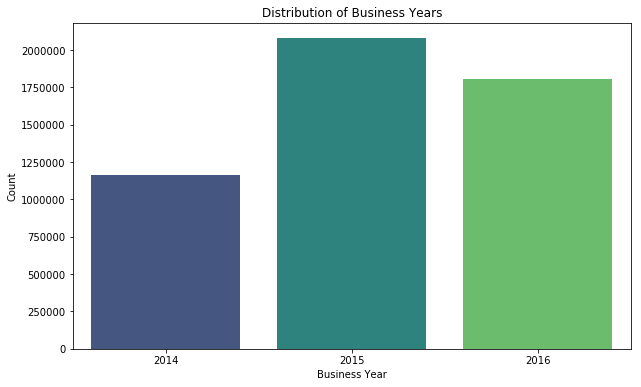

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=business_year_counts.index, y=business_year_counts.values, palette='viridis')
plt.title('Distribution of Business Years')
plt.xlabel('Business Year')
plt.ylabel('Count')
plt.show()

# Finding - 2 :

In [31]:
#value count of each unique value present in the column
covered_counts = benefits_new['IsCovered'].value_counts()
print(covered_counts)

covered        3934525
not covered     897903
Unknown         215980
Name: IsCovered, dtype: int64


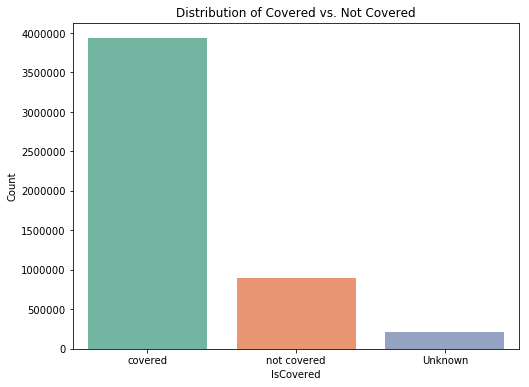

In [32]:
plt.figure(figsize=(8, 6))
sns.barplot(x=covered_counts.index, y=covered_counts.values, palette='Set2')
plt.title('Distribution of Covered vs. Not Covered')
plt.xlabel('IsCovered')
plt.ylabel('Count')
plt.show()

# Finding - 3 :

In [33]:
#top 10 issuers
issuer_counts = benefits_new['IssuerId'].value_counts().sort_values(ascending=False)[:10]
print(issuer_counts)

33602    241412
84670    138454
36096    127737
27357    105484
14002     92944
56503     84266
37833     80379
28162     76932
87571     76167
68781     65286
Name: IssuerId, dtype: int64


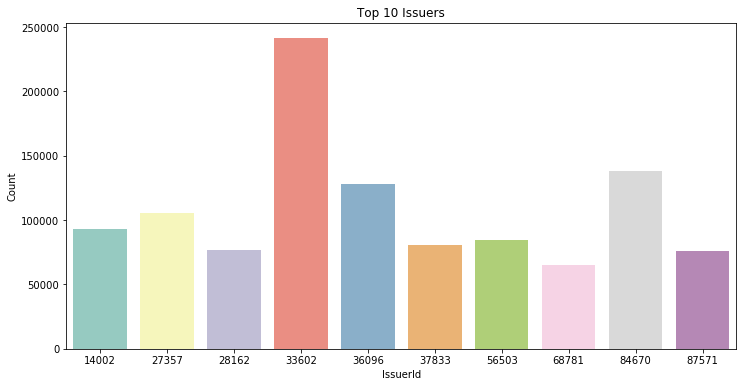

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=issuer_counts.index, y=issuer_counts.values, palette='Set3')
plt.title('Top 10 Issuers')
plt.xlabel('IssuerId')
plt.ylabel('Count')
plt.show()


# Finding - 4 :

In [35]:
#value count of each state / distiribution
state_counts = benefits_new['StateCode'].value_counts()
print(state_counts.head()) #viewing top 5 only

WI    512587
TX    465164
FL    364742
OH    331045
IL    320533
Name: StateCode, dtype: int64


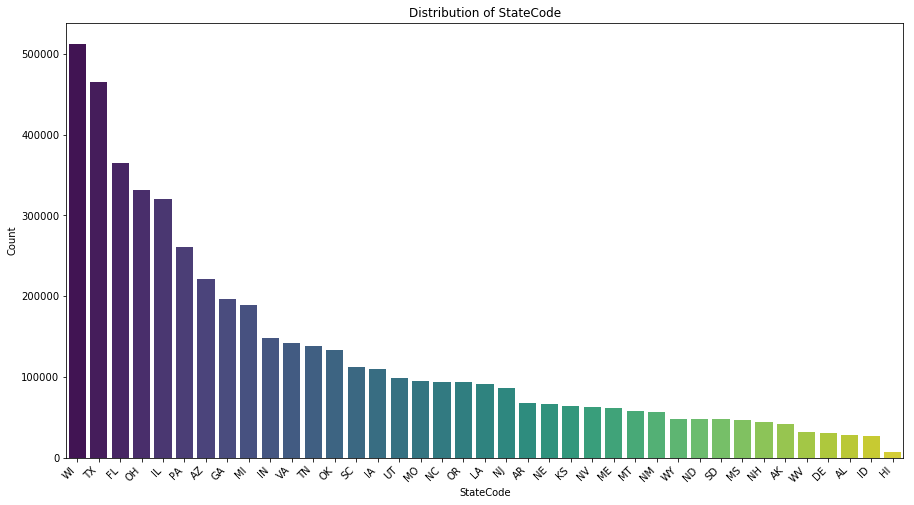

In [36]:
plt.figure(figsize=(15, 8))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Distribution of StateCode')
plt.xlabel('StateCode')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Finding - 5 :

In [37]:
#distribution of IsCovered by StateCode
iscovered_state_distribution = pd.crosstab(benefits_new['StateCode'], benefits_new['IsCovered'], margins=True, margins_name="Total")
print(iscovered_state_distribution.head())

IsCovered  Unknown  covered  not covered   Total
StateCode                                       
AK            5110    32214         3996   41320
AL             537    21594         6286   28417
AR            6424    51683         9957   68064
AZ           18377   179153        24082  221612
DE            1215    25173         4982   31370


<Figure size 1440x1440 with 0 Axes>

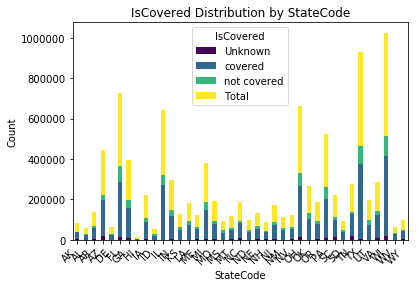

In [38]:
plt.figure(figsize=(20, 20))
iscovered_state_distribution.drop("Total").plot(kind='bar', stacked=True, colormap='viridis')
plt.title('IsCovered Distribution by StateCode')
plt.xlabel('StateCode')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()

# Finding - 6 :

In [39]:
#top 5 most common benefit name values
top_5_benefit_names = benefits_new['BenefitName'].value_counts().head(5)

print(top_5_benefit_names)

Orthodontia - Adult             77377
Accidental Dental               77353
Basic Dental Care - Child       77353
Dental Check-Up for Children    77353
Major Dental Care - Child       77353
Name: BenefitName, dtype: int64


# Finding - 7 :

In [40]:
#highest used benefit name for each state
highest_benefit_by_state = benefits_new.groupby('StateCode')['BenefitName'].agg(lambda x: x.value_counts().idxmax()).reset_index()

highest_benefit_by_state.columns = ['StateCode', 'Highest BenefitName']
print(highest_benefit_by_state.head()) #top 5 from result

  StateCode        Highest BenefitName
0        AK  Major Dental Care - Child
1        AL        Orthodontia - Child
2        AR        Orthodontia - Adult
3        AZ        Orthodontia - Child
4        DE        Orthodontia - Child


# Finding - 8 :

In [41]:
#unique plans for each SourceName
plans_by_source = benefits_new.groupby('SourceName')['PlanId'].nunique()
print(plans_by_source)

SourceName
HIOS     31541
OPM       1235
SERFF    19648
Name: PlanId, dtype: int64


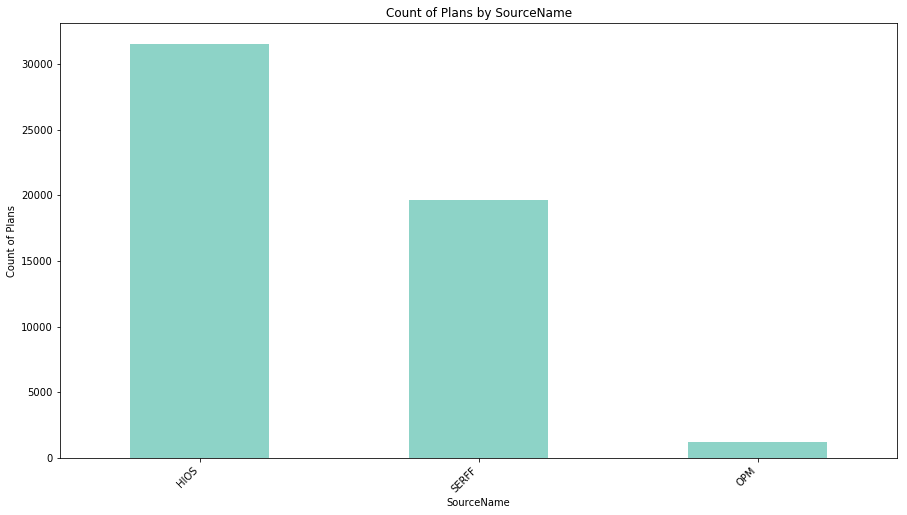

In [42]:
plt.figure(figsize=(15, 8))
plans_by_source.sort_values(ascending=False).plot(kind='bar', colormap='Set3')
plt.title('Count of Plans by SourceName')
plt.xlabel('SourceName')
plt.ylabel('Count of Plans')
plt.xticks(rotation=45, ha='right')
plt.show()

# Finding - 9 :

In [43]:
#count of unique plans for each SourceName and StateCode
plans_by_source_state = benefits_new.groupby(['SourceName', 'StateCode'])['PlanId'].nunique().unstack()

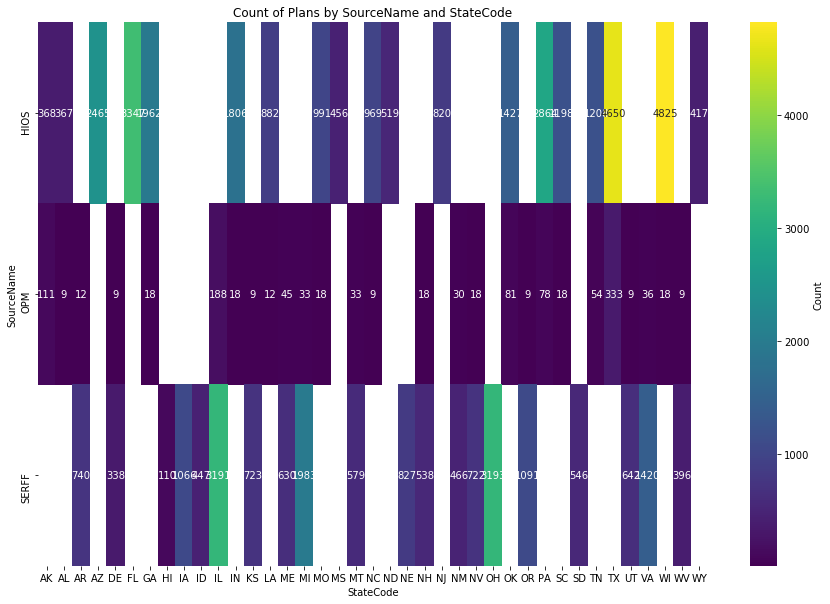

In [44]:
plt.figure(figsize=(15, 10))
sns.heatmap(plans_by_source_state, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Count'})
plt.title('Count of Plans by SourceName and StateCode')
plt.xlabel('StateCode')
plt.ylabel('SourceName')
plt.show()

# Finding - 10 :

In [45]:
#count of frequency between StateCode and SourceName
state_source_cross_tab = pd.crosstab(benefits_new['StateCode'], benefits_new['SourceName'])

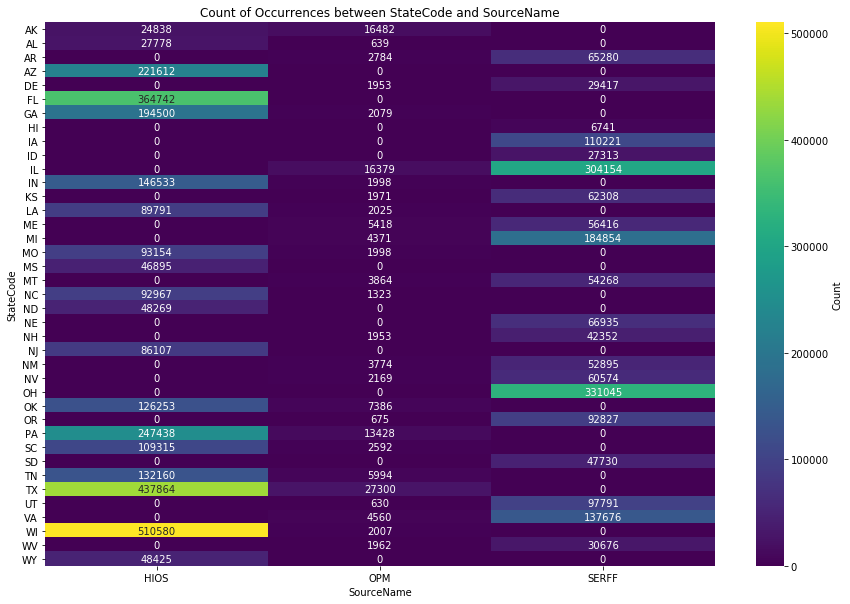

In [46]:
plt.figure(figsize=(15, 10))
sns.heatmap(state_source_cross_tab, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Count'})
plt.title('Count of Occurrences between StateCode and SourceName')
plt.xlabel('SourceName')
plt.ylabel('StateCode')
plt.show()

# Conclusion 1

Based on the above analysis and visualization, below are some key findings from that.

The analysis of the health insurance benefits dataset provides valuable insights into various aspects of the insurance plans.

1. Business Year Distribution:

    The dataset spans business years 2014 to 2016.
    The distribution of plans across these years is as follows:
    2014: 1164869 plans
    2015: 2079286 plans
    2016: 1804253 plans
---------------------------------------------------------------------------------------------------------------------------    

2. Coverage Distribution:

    The majority of plans are labeled as covered (3934525 plans), followed by not covered (897903 plans), and            Unknown status (215980 plans).
---------------------------------------------------------------------------------------------------------------------------

3. Top Issuers:

    The top 10 issuers by Issuer ID are identified based on the number of plans they offer.
    The issuer with ID 33602 leads with 241412 plans, followed by others in descending order.
---------------------------------------------------------------------------------------------------------------------------

4. State-wise Distribution:

    The dataset covers plans from various states, with WI having the highest representation (512587 plans),
    followed by TX, FL, OH, and IL.
--------------------------------------------------------------------------------------------------------------------------

5. IsCovered Distribution by State:

    IsCovered against StateCode provides a breakdown of covered, not covered, and unknown status
    for each state.
---------------------------------------------------------------------------------------------------------------------------

6. Top 5 Benefit Names:

    The most common benefit names and their respective counts are identified. The top 5 benefits are related to dental care
    and orthodontia.
---------------------------------------------------------------------------------------------------------------------------

7. Plan Count by SourceName:

    The count of unique plans for each SourceName is analyzed. HIOS has the highest number of plans (31541), followed     by SERFF, and OPM.

# Understand the Market Dynamics for Health Insurance Plans & develop a Targeted Marketing Strategy

In [47]:
rate.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [48]:
rate.info() #data info - original

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12694445 entries, 0 to 12694444
Data columns (total 24 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   BusinessYear                               int64  
 1   StateCode                                  object 
 2   IssuerId                                   int64  
 3   SourceName                                 object 
 4   VersionNum                                 int64  
 5   ImportDate                                 object 
 6   IssuerId2                                  int64  
 7   FederalTIN                                 object 
 8   RateEffectiveDate                          object 
 9   RateExpirationDate                         object 
 10  PlanId                                     object 
 11  RatingAreaId                               object 
 12  Tobacco                                    object 
 13  Age                                     

In [49]:
rate.isnull().sum()

BusinessYear                                        0
StateCode                                           0
IssuerId                                            0
SourceName                                          0
VersionNum                                          0
ImportDate                                          0
IssuerId2                                           0
FederalTIN                                          0
RateEffectiveDate                                   0
RateExpirationDate                                  0
PlanId                                              0
RatingAreaId                                        0
Tobacco                                             0
Age                                                 0
IndividualRate                                      0
IndividualTobaccoRate                         7762096
Couple                                       12653504
PrimarySubscriberAndOneDependent             12653504
PrimarySubscriberAndTwoDepen

In [50]:
rate

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12694440,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2033
12694441,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2034
12694442,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2035
12694443,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2036


In [51]:
rate['BusinessYear'].value_counts()

2015    4676092
2016    4221965
2014    3796388
Name: BusinessYear, dtype: int64

In [52]:
rate['StateCode'].describe() #detail information about targeted column for analysis.

count     12694445
unique          39
top             FL
freq       1702472
Name: StateCode, dtype: object

In [53]:
rate['IssuerId'].nunique() #count of unique value present in the data

910

In [54]:
rate['SourceName'].value_counts() #value count of each unique value present in the data

HIOS     8702452
SERFF    3853855
OPM       138138
Name: SourceName, dtype: int64

In [55]:
rate['PlanId'].describe()

count           12694445
unique             16808
top       16842FL0010001
freq               36984
Name: PlanId, dtype: object

In [56]:
rate['Tobacco'].describe() #detail information about targeted column for analysis.

count          12694445
unique                2
top       No Preference
freq            7804323
Name: Tobacco, dtype: object

In [57]:
rate['Tobacco'].value_counts()

No Preference                    7804323
Tobacco User/Non-Tobacco User    4890122
Name: Tobacco, dtype: int64

In [58]:
rate['Age'].describe()

count     12694445
unique          47
top           0-20
freq        275489
Name: Age, dtype: object

In [59]:
rate['Age'].value_counts().head()

0-20    275489
44      275067
24      275067
49      275067
32      275067
Name: Age, dtype: int64

In [60]:
rate['ImportDate'].describe()

count                12694445
unique                    266
top       2013-11-26 13:14:08
freq                   511886
Name: ImportDate, dtype: object

In [61]:
rate['IssuerId'].equals(rate['IssuerId2']) #checking for duplicate column (different column name)

True

In [62]:
rate['RatingAreaId'].describe()

count          12694445
unique               67
top       Rating Area 1
freq             978906
Name: RatingAreaId, dtype: object

In [63]:
rate['RatingAreaId'].nunique()

67

In [64]:
rate['RatingAreaId'].value_counts()  #value count of each unique value present in the data

Rating Area 1     978906
Rating Area 2     934953
Rating Area 3     920486
Rating Area 4     907736
Rating Area 5     823124
                   ...  
Rating Area 54     17309
Rating Area 62     17033
Rating Area 65     17033
Rating Area 67     17033
Rating Area 63     17033
Name: RatingAreaId, Length: 67, dtype: int64

In [65]:
rate['IndividualRate'].nunique()

149181

In [66]:
rate['IndividualTobaccoRate'].value_counts()

306.000000     381
312.000000     368
369.000000     353
282.000000     352
252.000000     351
              ... 
1617.500000      1
2350.000000      1
610.621391       1
2057.080000      1
2185.000000      1
Name: IndividualTobaccoRate, Length: 153930, dtype: int64

In [67]:
#targeted columns from the rate DataFrame into the new dataframe
rate_new = rate[['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'PlanId', 
                  'Tobacco', 'Age', 'ImportDate', 'IndividualRate']]

In [68]:
rate_new.head()

,BusinessYear,StateCode,IssuerId,SourceName,PlanId,Tobacco,Age,ImportDate,IndividualRate
0,2014,AK,21989,HIOS,21989AK0010001,No Preference,0-20,2014-03-19 07:06:49,29.00
1,2014,AK,21989,HIOS,21989AK0020001,No Preference,Family Option,2014-03-19 07:06:49,36.95
2,2014,AK,21989,HIOS,21989AK0020001,No Preference,Family Option,2014-03-19 07:06:49,36.95
3,2014,AK,21989,HIOS,21989AK0010001,No Preference,21,2014-03-19 07:06:49,32.00
4,2014,AK,21989,HIOS,21989AK0010001,No Preference,22,2014-03-19 07:06:49,32.00


In [69]:
rate_new.info() #new derived dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12694445 entries, 0 to 12694444
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   BusinessYear    int64  
 1   StateCode       object 
 2   IssuerId        int64  
 3   SourceName      object 
 4   PlanId          object 
 5   Tobacco         object 
 6   Age             object 
 7   ImportDate      object 
 8   IndividualRate  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 871.7+ MB


In [70]:
rate_new['Age'].unique()

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'], dtype=object)

In [71]:
#ImportDate to datetime format
rate_new['ImportDate'] = pd.to_datetime(rate_new['ImportDate'])

In [72]:
rate_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12694445 entries, 0 to 12694444
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   BusinessYear    int64         
 1   StateCode       object        
 2   IssuerId        int64         
 3   SourceName      object        
 4   PlanId          object        
 5   Tobacco         object        
 6   Age             object        
 7   ImportDate      datetime64[ns]
 8   IndividualRate  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 871.7+ MB


# Analysis Start Here:

Understand the distribution and characteristics of health insurance plans across different states and age groups to
identify potential markets to target or areas where the company could improve its offerings. Understand the value
proposition of different plans and recommend the top 5 avenues where marketing effort should be spent by plan, age, and
state.

Note: I intentionally not including other parameter as task is focused majorly on Age, State and Plan.

# Analyzing Individual Rates by Plan (Report - 1):

The distribution of individual rates for each health insurance plan.

In [73]:
individual_rates_stats = rate_new.groupby('PlanId')['IndividualRate'].describe()

print("Summary Statistics for Individual Rates by Plan:")
print(individual_rates_stats.to_string())

Summary Statistics for Individual Rates by Plan:
                  count           mean           std         min            25%            50%            75%            max
PlanId                                                                                                                      
10046HI0020003     46.0      65.915870  2.837863e+00   56.120000      66.310000      66.310000      66.310000      79.570000
10046HI0020004     46.0      54.997609  2.022407e+00   51.590000      55.120000      55.120000      55.120000      66.140000
10046HI0020005     46.0      52.185435  2.095540e+00   46.590000      52.450000      52.450000      52.450000      62.940000
10046HI0020006     46.0      37.805000  1.910970e+00   35.300000      37.710000      37.710000      37.710000      46.590000
10064IN0050001     34.0      33.167647  2.709374e+00   29.130000      31.890000      33.320000      36.190000      38.840000
10064IN0050002     34.0      33.167647  2.709374e+00   29.130000      31.890

Plans with competitive pricing or unique value propositions.

In [74]:
competitive_plans = individual_rates_stats.sort_values('mean').head(10)

print("Top 10 Plans with Competitive Pricing:\n")
print(competitive_plans.to_string())

Top 10 Plans with Competitive Pricing:

                count  mean  std  min  25%  50%  75%  max
PlanId                                                   
49193FL0270003   67.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
80550WI0010002   16.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
80550WI0010003   16.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
58255OH0220002   17.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
80550WI0010004   16.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
80550WI0010005   16.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
80550WI0010006   16.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
80550WI0020001   16.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
80550WI0020002   16.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
80550WI0020003   16.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


# Plan Distribution Across Age Groups (Report - 2):

The distribution of health insurance plans across different age groups.

In [75]:
plans_distribution_age = rate_new.groupby('Age')['PlanId'].nunique()

print("Plan Distribution Across Age Groups:")
print(plans_distribution_age.to_frame().to_string())

Plan Distribution Across Age Groups:
               PlanId
Age                  
0-20            15429
21              15425
22              15425
23              15425
24              15425
25              15425
26              15425
27              15425
28              15425
29              15425
30              15425
31              15425
32              15425
33              15425
34              15425
35              15425
36              15425
37              15425
38              15425
39              15425
40              15425
41              15425
42              15425
43              15425
44              15425
45              15425
46              15425
47              15425
48              15425
49              15425
50              15425
51              15425
52              15425
53              15425
54              15425
55              15425
56              15425
57              15425
58              15425
59              15425
60              15425
61              1

Plans that are popular among specific age demographics.

In [76]:
popular_plans_by_age = rate_new.groupby(['Age', 'PlanId']).size().groupby('Age').idxmax().to_frame().reset_index()
popular_plans_by_age.columns = ['Age', 'Most Popular Plan']

print("Popular Plans by Age:\n")
print(popular_plans_by_age.to_string(index=False))

Popular Plans by Age:

          Age               Most Popular Plan
         0-20          (0-20, 16842FL0010001)
           21            (21, 16842FL0010001)
           22            (22, 16842FL0010001)
           23            (23, 16842FL0010001)
           24            (24, 16842FL0010001)
           25            (25, 16842FL0010001)
           26            (26, 16842FL0010001)
           27            (27, 16842FL0010001)
           28            (28, 16842FL0010001)
           29            (29, 16842FL0010001)
           30            (30, 16842FL0010001)
           31            (31, 16842FL0010001)
           32            (32, 16842FL0010001)
           33            (33, 16842FL0010001)
           34            (34, 16842FL0010001)
           35            (35, 16842FL0010001)
           36            (36, 16842FL0010001)
           37            (37, 16842FL0010001)
           38            (38, 16842FL0010001)
           39            (39, 16842FL0010001)
           

# Plan Distribution Across States (Report - 3):

Geographical distribution of health insurance plans across states.

In [77]:
plans_distribution_state = rate_new.groupby('StateCode')['PlanId'].nunique()

print("Plan Distribution Across States:")
print(plans_distribution_state.to_frame().to_string())

Plan Distribution Across States:
           PlanId
StateCode        
AK            203
AL            180
AR            249
AZ            730
DE            139
FL           1021
GA            607
HI             33
IA            368
ID            149
IL            950
IN            623
KS            247
LA            315
ME            244
MI            735
MO            379
MS            114
MT            222
NC            349
ND            215
NE            283
NH            198
NJ            349
NM            123
NV            198
OH           1051
OK            541
OR            244
PA            989
SC            401
SD            195
TN            389
TX           1348
UT            162
VA            553
WI           1384
WV            156
WY            172


States where specific plans have a higher market share.

In [78]:
popular_plans_by_state = rate_new.groupby(['StateCode', 'PlanId']).size().groupby('StateCode').idxmax().to_frame().reset_index()
popular_plans_by_state.columns = ['StateCode', 'Most Popular Plan']

print("\nPopular Plans by State:")
print(popular_plans_by_state.to_string(index=False))


Popular Plans by State:
StateCode    Most Popular Plan
       AK (AK, 38344AK0980003)
       AL (AL, 46944AL0280001)
       AR (AR, 75293AR0450001)
       AZ (AZ, 17100AZ0160001)
       DE (DE, 76168DE0430001)
       FL (FL, 16842FL0010001)
       GA (GA, 55612GA0160001)
       HI (HI, 10046HI0020003)
       IA (IA, 41482IA0070001)
       ID (ID, 60597ID0210001)
       IL (IL, 36096IL0770001)
       IN (IN, 69051IN0110001)
       KS (KS, 18558KS0370001)
       LA (LA, 67243LA0100001)
       ME (ME, 28804ME0100001)
       MI (MI, 11083MI0100001)
       MO (MO, 68396MO0190001)
       MS (MS, 48963MS0510001)
       MT (MT, 23603MT0170007)
       NC (NC, 40435NC0170001)
       ND (ND, 37160ND2440001)
       NE (NE, 29678NE1120001)
       NH (NH, 44500NH0080001)
       NJ (NJ, 53877NJ0230001)
       NM (NM, 17911NM0060001)
       NV (NV, 60156NV0240007)
       OH (OH, 99969OH0050013)
       OK (OK, 87571OK0300001)
       OR (OR, 10091OR0360004)
       PA (PA, 98060PA0170001)
       SC (SC,

# Top Plans by Age and State (Report - 4):

Top health insurance plans for each age group within each state.

In [79]:
top_plans_by_age_state = rate_new.groupby(['Age', 'StateCode', 'PlanId'])['IndividualRate'].mean().groupby(['Age', 'StateCode']).idxmin()

print("Top Plans by Age and State:")
print(top_plans_by_age_state.to_frame().to_string())

Top Plans by Age and State:
                                              IndividualRate
Age           StateCode                                     
0-20          AK                  (0-20, AK, 47904AK0070002)
              AL                  (0-20, AL, 28899AL0040001)
              AR                  (0-20, AR, 28348AR0140019)
              AZ                  (0-20, AZ, 53613AZ0030001)
              DE                  (0-20, DE, 67775DE0010003)
              FL                  (0-20, FL, 15833FL0080001)
              GA                  (0-20, GA, 68806GA0020004)
              HI                  (0-20, HI, 18350HI0930001)
              IA                  (0-20, IA, 41482IA0070001)
              ID                  (0-20, ID, 61589ID1930001)
              IL                  (0-20, IL, 87304IL0020001)
              IN                  (0-20, IN, 45958IN0020001)
              KS                  (0-20, KS, 93384KS0090001)
              LA                  (0-20, LA, 18575LA00500

# Overall Market Presence (Report - 5):

Assess the overall market presence of each health insurance plan.

In [80]:
overall_market_presence = rate_new.groupby('PlanId')['IndividualRate'].count()

print("Overall Market Presence of Each Plan:")
print(overall_market_presence.to_frame().to_string())

Overall Market Presence of Each Plan:
                IndividualRate
PlanId                        
10046HI0020003              46
10046HI0020004              46
10046HI0020005              46
10046HI0020006              46
10064IN0050001              34
10064IN0050002              34
10091OR0360004             644
10091OR0360005             644
10091OR0360006              92
10091OR0360007              92
10091OR0360008              92
10091OR0360009             506
10091OR0360010             276
10091OR0360011             276
10091OR0360012             276
10091OR0370002              92
10091OR0370003             506
10091OR0370004             276
10091OR0380003             644
10091OR0380004             322
10091OR0380005             322
10091OR0380006              92
10091OR0380007              92
10091OR0380008              92
10091OR0380009              92
10091OR0380010             322
10091OR0380011             598
10091OR0380012             276
10091OR0380013             276
1

Plans that have a strong presence across various age groups and states.

In [81]:
strong_presence_plans = overall_market_presence.sort_values(ascending=False).head(10)

print("\nTop 10 Plans with Strong Market Presence:")
print(strong_presence_plans.to_frame().to_string())


Top 10 Plans with Strong Market Presence:
                IndividualRate
PlanId                        
16842FL0010001           36984
16842FL0010002           36984
26065SC0360001           25392
49532SC0370008           25392
49532SC0370006           25392
26065SC0360002           25392
97325SC0080002           25392
84966SC0120001           25392
97325SC0080003           25392
97325SC0080004           25392


# Conculsion : Targeted Marketing Strategy and Planning based on Report Generated.

1. Individual Rates by Plan:
    
    (Refer to analysis Report - 1 for actual generated information and detail for the same.)

    Aanalysis of individual rates for various health insurance plans. This involved exploring the
    distribution of rates for each plan, identifying plans with competitive pricing or unique value propositions.
    The analysis provides insights into the affordability and distinctiveness of different health insurance offerings.
---------------------------------------------------------------------------------------------------------------------------

2. Plan Distribution Across Age Groups:

    (Refer to analysis Report - 2 for actual generated information and detail for the same.)

    Health insurance plans are distributed across different age groups. By identifying plans that are
    popular among specific age demographics, we gained valuable insights into the preferences and needs of various age brackets.
    This information is crucial for tailoring marketing strategies and plan designs to specific age-related requirements.
---------------------------------------------------------------------------------------------------------------------------

3. Plan Distribution Across States:

    (Refer to analysis Report - 3 for actual generated information and detail for the same.)

    The geographical distribution of health insurance plans across states was explored, helping us identify regions where
    specific plans have a higher market share. Understanding the state-wise popularity of plans is vital for targeted marketing
    efforts and strategic planning to meet the diverse needs of different regions.
---------------------------------------------------------------------------------------------------------------------------

4. Top Plans by Age and State:

    (Refer to analysis Report - 4 for actual generated information and detail for the same.)

    The top health insurance plans for each age group within each state allows us to focus on plans that resonate
    well with specific age demographics in different regions. This information is instrumental in designing regional marketing
    campaigns and optimizing plans based on local preferences.
---------------------------------------------------------------------------------------------------------------------------

5. Overall Market Presence:

    (Refer to analysis Report - 5 for actual generated information and detail for the same.)

    The overall market presence of each health insurance plan, identifying plans that have a strong presence
    across various age groups and states. This global perspective is valuable for making decisions that impact the entire
    market and can guide efforts to strengthen the market position of specific plans.



In summary, this analysis provides a comprehensive view of the health insurance landscape, offering actionable insights
for marketing strategies, plan optimization, and regional customization to meet the diverse needs of the market.

# Task Ends Here